# Labo3: Machine Learning 

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading data

In [2]:
cement_strength = pd.read_csv("../datasets/concrete(1).csv")

In [3]:
cement_strength.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

In [4]:
cement_strength.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
cement_strength.describe()

cement         slag          ash        water  superplastic  \
count  1030.000000  1030.000000  1030.000000  1030.000000   1030.000000   
mean    281.167864    73.895825    54.188350   181.567282      6.204660   
std     104.506364    86.279342    63.997004    21.354219      5.973841   
min     102.000000     0.000000     0.000000   121.800000      0.000000   
25%     192.375000     0.000000     0.000000   164.900000      0.000000   
50%     272.900000    22.000000     0.000000   185.000000      6.400000   
75%     350.000000   142.950000   118.300000   192.000000     10.200000   
max     540.000000   359.400000   200.100000   247.000000     32.200000   

         coarseagg      fineagg          age     strength  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean    972.918932   773.580485    45.662136    35.817961  
std      77.753954    80.175980    63.169912    16.705742  
min     801.000000   594.000000     1.000000     2.330000  
25%     932.000000   730.950000     7.000000    23.710000  
50%     968.000000   779.500000    28.000000    34.445000  
75%    1029.400000   824.000000    56.000000    46.135000  
max    1145.000000   992.600000   365.000000    82.600000

## Training a Linear Regression Model

## X and Y arrays

In [6]:
cement_strength.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [7]:
X = cement_strength[['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg','fineagg', 'age']]
y = cement_strength['strength']

## Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=101)

## Creating and Training the Model

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lm = LinearRegression()

In [15]:
lm.fit(X_train,y_train)

LinearRegression()

## Model Evaluation

In [18]:
print(lm.intercept_)

-62.51830935011358


In [19]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
cement           0.130672
slag             0.117919
ash              0.096695
water           -0.092902
superplastic     0.236741
coarseagg        0.030692
fineagg          0.036198
age              0.116258

## Predictions from our model

In [20]:
predictions = lm.predict(X_test)

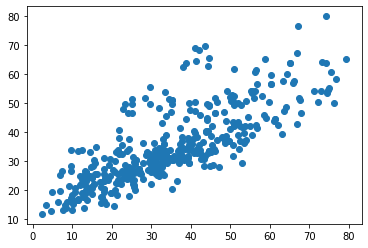

In [21]:
plt.scatter(y_test,predictions)

C:\Users\maxPC\anaconda3\envs\SmartSystems\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


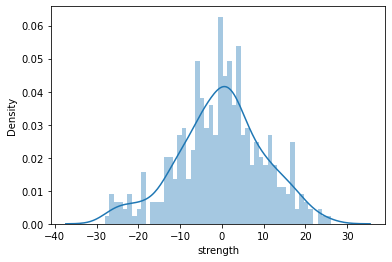

In [17]:
sns.distplot((y_test-predictions),bins=50);

## Regression Evaluation Metrics

In [23]:
from sklearn import metrics

In [24]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 8.058290071199828
MSE: 107.79307190805169
RMSE: 10.382344239527589


In [25]:
from sklearn.preprocessing import PolynomialFeatures
polyFeat = PolynomialFeatures(degree=2)
polyFeat = polyFeat.fit(X)
X_poly = polyFeat.transform(X)

In [26]:
from sklearn.model_selection import train_test_split
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(pd.DataFrame(X_poly), y, test_size=0.4, random_state=101)

In [27]:
from sklearn.linear_model import LinearRegression
lm_poly = LinearRegression()
lm_poly.fit(X_poly_train,y_poly_train)

LinearRegression()

In [28]:
print(lm_poly.intercept_)

-2858610313.001333


In [29]:
lm_poly.coef_

array([ 2.85860642e+09,  1.76518769e+00,  9.90395220e-01,  5.73440350e-01,
        1.41607195e+01,  3.58677774e+01,  2.31786953e+00,  2.66658596e+00,
       -2.44058606e-01, -4.15542256e-04, -4.96336034e-04, -7.19969690e-05,
       -4.13812616e-03, -1.08994847e-02, -2.83860464e-04, -3.12219245e-04,
        4.12334104e-04, -2.82238018e-04,  6.15625945e-04, -2.11560162e-03,
       -7.53176012e-03, -6.38348707e-05, -2.50755635e-04,  2.00419381e-04,
        5.87103112e-04, -4.06914624e-03, -1.42378440e-02,  1.94817872e-04,
        7.02981994e-05,  8.12689506e-04, -9.32361148e-03, -4.26477029e-02,
       -5.70306368e-03, -4.38877330e-03, -4.30877105e-04, -6.75063013e-02,
       -1.39813811e-02, -1.14956677e-02,  4.55657605e-03, -2.20696865e-04,
       -8.40119999e-04,  9.22483584e-06, -5.44851109e-04,  5.05682906e-04,
       -3.07172317e-04])

In [25]:
coeff_df_poly = pd.DataFrame(lm_poly.coef_, pd.DataFrame(X_poly).columns,columns=['Coefficient'])
coeff_df_poly

Coefficient
0   2.858606e+09
1   1.765188e+00
2   9.903952e-01
3   5.734404e-01
4   1.416072e+01
5   3.586778e+01
6   2.317870e+00
7   2.666586e+00
8  -2.440586e-01
9  -4.155423e-04
10 -4.963360e-04
11 -7.199697e-05
12 -4.138126e-03
13 -1.089948e-02
14 -2.838605e-04
15 -3.122192e-04
16  4.123341e-04
17 -2.822380e-04
18  6.156259e-04
19 -2.115602e-03
20 -7.531760e-03
21 -6.383487e-05
22 -2.507556e-04
23  2.004194e-04
24  5.871031e-04
25 -4.069146e-03
26 -1.423784e-02
27  1.948179e-04
28  7.029820e-05
29  8.126895e-04
30 -9.323611e-03
31 -4.264770e-02
32 -5.703064e-03
33 -4.388773e-03
34 -4.308771e-04
35 -6.750630e-02
36 -1.398138e-02
37 -1.149567e-02
38  4.556576e-03
39 -2.206969e-04
40 -8.401200e-04
41  9.224836e-06
42 -5.448511e-04
43  5.056829e-04
44 -3.071723e-04

In [30]:
lm_poly

LinearRegression()

In [31]:
poly_predictions = lm_poly.predict(X_poly_test)

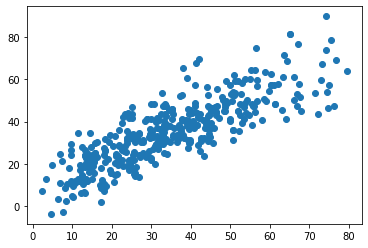

In [28]:
plt.scatter(y_poly_test,poly_predictions)

In [32]:
print('MAE:', metrics.mean_absolute_error(y_poly_test, poly_predictions))
print('MSE:', metrics.mean_squared_error(y_poly_test, poly_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_poly_test, poly_predictions)))

MAE: 7.333803188870255
MSE: 88.24747463113627
RMSE: 9.394012701244142


In [33]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 8.058290071199828
MSE: 107.79307190805169
RMSE: 10.382344239527589


## Pickle Export and Test the pkl model

In [35]:
# Save model as Pickle file
import pickle
pickle.dump(lm, open('./CementStrength.pkl','wb'))

In [36]:
# cement - slag - ash - water - superplastic - coarseagg - fineagg - age - strength
test_prediction_value=lm.predict(pd.DataFrame([[280,25,0,200,6.4,1000,754,20]]))
print(test_prediction_value)

[20.26336205]


In [37]:
# Test with pickle model
model_pkl = pickle.load(open('./CementStrength.pkl','rb'))
print(model_pkl.predict(pd.DataFrame([[280,25,0,200,6.4,1000,754,20]])))

[20.26336205]
